In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps

sns.set()

print ('!!!!! RUN new_york_data to update the info before running this one !!!!!')

!!!!! RUN new_york_data to update the info before running this one !!!!!


In [2]:
dick = pd.read_pickle('us_state_dict.pkl')


In [3]:
df = pd.DataFrame()

def get_latest_numbers(df,statename):
    state = dick[statename]
    last_row = pd.DataFrame(state.iloc[-1]).T
    last_row['state'] = statename
    df = pd.concat([df,last_row],axis=0)
    return df

    

In [4]:
for key,data in dick.items():
    df = get_latest_numbers(df,key)
    
df.sort_values('dead_per_M',inplace=True,ascending=False)
df.head(40)
df.to_pickle('US_states_latest_day.pkl')

In [5]:
df.describe()

,confirmed,deceased,recovered,inc,dead_inc,factor,dead_factor,density,population,growth,gdp,conf_per_M,dead_per_M
count,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,50.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000
mean,7751.490196,248.803922,0.0,578.196078,37.960784,1.092991,1.166943,1117.736584,6.496451e+06,0.010941,64468.529412,916.237200,26.950257
std,20352.421979,782.617353,0.0,1246.116255,115.120626,0.046258,0.149646,4266.295547,7.450657e+06,0.013758,23600.489132,1242.432640,46.138380
min,213.000000,0.000000,0.0,0.000000,-2.000000,1.000000,0.916667,3.331502,5.670250e+05,-0.018500,40012.000000,187.521785,0.000000
25%,920.000000,14.500000,0.0,63.500000,1.000000,1.060536,1.063542,131.065960,1.802113e+06,0.001650,53364.000000,321.155028,6.603847
50%,2124.000000,64.000000,0.0,147.000000,7.000000,1.087558,1.136780,279.847438,4.499692e+06,0.007500,60045.000000,463.907088,10.816904
75%,6645.500000,176.000000,0.0,425.500000,25.500000,1.111476,1.223684,580.113566,7.587794e+06,0.022500,68820.500000,922.130324,24.988244
max,139875.000000,5489.000000,0.0,8060.000000,791.000000,1.206180,1.565217,30599.520715,3.993749e+07,0.041000,209260.000000,7195.042465,282.349155


In [6]:
df['mortality'] = df['deceased'] / df['confirmed']
df.head(40)

,confirmed,deceased,recovered,inc,dead_inc,factor,dead_factor,density,population,growth,gdp,conf_per_M,dead_per_M,state,mortality
2020-04-07,139875.0,5489.0,0.0,8060.0,791.0,1.061146,1.168370,1068.424744,19440469.0,-0.0052,89076.0,7195.042465,282.349155,New York,0.039242
2020-04-07,44416.0,1232.0,0.0,3326.0,229.0,1.080944,1.228315,3147.351220,8936574.0,0.0031,72850.0,4970.137326,137.860437,New Jersey,0.027738
2020-04-07,16284.0,582.0,0.0,1417.0,70.0,1.095312,1.136719,278.469047,4645184.0,-0.0032,56836.0,3505.566195,125.291054,Louisiana,0.035741
2020-04-07,18970.0,845.0,0.0,1749.0,118.0,1.101562,1.162311,460.151533,10045029.0,0.0049,54420.0,1888.496290,84.121211,Michigan,0.044544
2020-04-07,7781.0,277.0,0.0,875.0,71.0,1.126701,1.344660,1905.891702,3563077.0,-0.0027,80489.0,2183.786654,77.741795,Connecticut,0.035600
2020-04-07,8692.0,400.0,0.0,381.0,19.0,1.045843,1.049869,303.876053,7797095.0,0.0347,80123.0,1114.774156,51.301158,Washington,0.046019
2020-04-07,15202.0,356.0,0.0,1365.0,96.0,1.098649,1.369231,2316.577310,6976597.0,0.0108,86798.0,2178.999303,51.027743,Massachusetts,0.023418
2020-04-07,575.0,23.0,0.0,32.0,0.0,1.058932,1.000000,176.485934,628061.0,0.0028,55841.0,915.516168,36.620647,Vermont,0.040000
2020-04-07,8822.0,329.0,0.0,1508.0,100.0,1.206180,1.436681,483.478001,10736059.0,0.0206,58921.0,821.716796,30.644392,Georgia,0.037293
2020-04-07,5429.0,179.0,0.0,246.0,29.0,1.047463,1.193333,146.078178,5845526.0,0.0263,68887.0,928.744479,30.621710,Colorado,0.032971


In [7]:
def standardize(n):
    return (n - n.mean()) / n.std()


def regression(x,y):
    
    alpha_mu = 0
    alpha_sigma = 1
    
    beta_mu = 1
    beta_sigma = 1
    
    alpha = pm.Normal('alpha',mu=alpha_mu,tau=1 / alpha_sigma ** 2)
    beta = pm.Normal('beta',mu=beta_mu, tau=1 / beta_sigma ** 2)
    obs_sigma = pm.Uniform('obs_sigma',0.1,1) # determines how much spread on the lines there is
    
    #### PRIOR SIMULATION
    N = 100000

    alpha_prior = [alpha.random() for i in range(N)]
    beta_prior = [beta.random() for i in range(N)]
    
    alphas = np.random.choice(alpha_prior,replace=True,size=100)
    betas = np.random.choice(beta_prior,replace=True,size=100)
    
    X = np.linspace(0,7,100)
    
    #plt.figure()
    #plt.title('Prior seeing data')
    #plt.plot(X,[X[i] * betas + alphas for i in range(len(X))],color='r',alpha=0.1)
    ####
    
    
    @pm.deterministic()
    def linreq(x=x,y=y,alpha=alpha,beta=beta):
        return x * beta + alpha
    
    
    obs = pm.Normal('obs',mu=linreq,tau=1/obs_sigma ** 2,observed=True,value=y)
    
    model = pm.Model([alpha,beta,obs_sigma,linreq])
    
    map_ = pm.MAP(model)
    map_.fit()
    
    mcmc = pm.MCMC(model)
    
    samples = mcmc.sample(10000,5000,2)
    
    alpha_post = mcmc.trace('alpha')[:]
    beta_post = mcmc.trace('beta')[:]
    obs_sigma_post = mcmc.trace('obs_sigma')[:]
    linreq_post = mcmc.trace('linreq')[:,0]
    
    result = pd.DataFrame({'alpha_post': alpha_post,
                          'beta_post': beta_post,
                          'obs_sigma_post': obs_sigma_post,
                          'linreq_post' : linreq_post})
    
    print (linreq_post.shape)
    
    return result
    
    
    


 [-----------------100%-----------------] 10000 of 10000 complete in 17.2 sec(2500,)

        alpha_post    beta_post  obs_sigma_post  linreq_post
count  2500.000000  2500.000000     2500.000000  2500.000000
mean     -0.030798     0.538446        0.857512     0.389266
std       0.115029     0.123730        0.072882     0.146796
min      -0.324035     0.120320        0.622386    -0.134785
25%      -0.120053     0.456672        0.804449     0.291133
50%      -0.005445     0.535460        0.858558     0.397240
75%       0.032396     0.615160        0.910763     0.485457
max       0.353076     0.934777        0.999855     0.864797


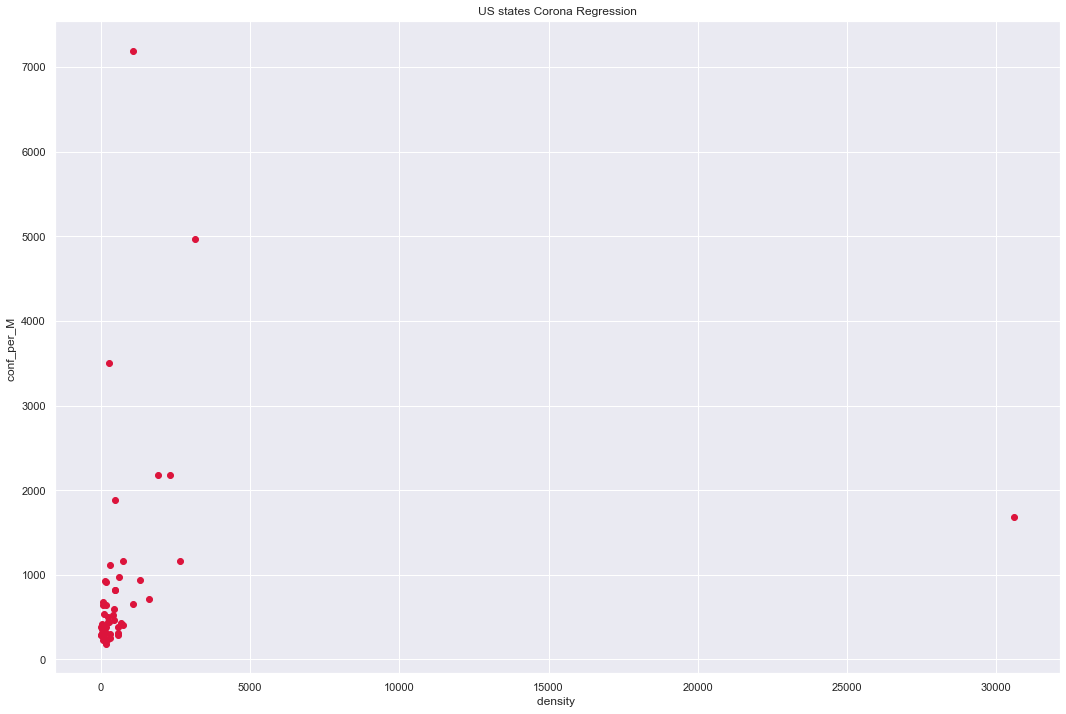

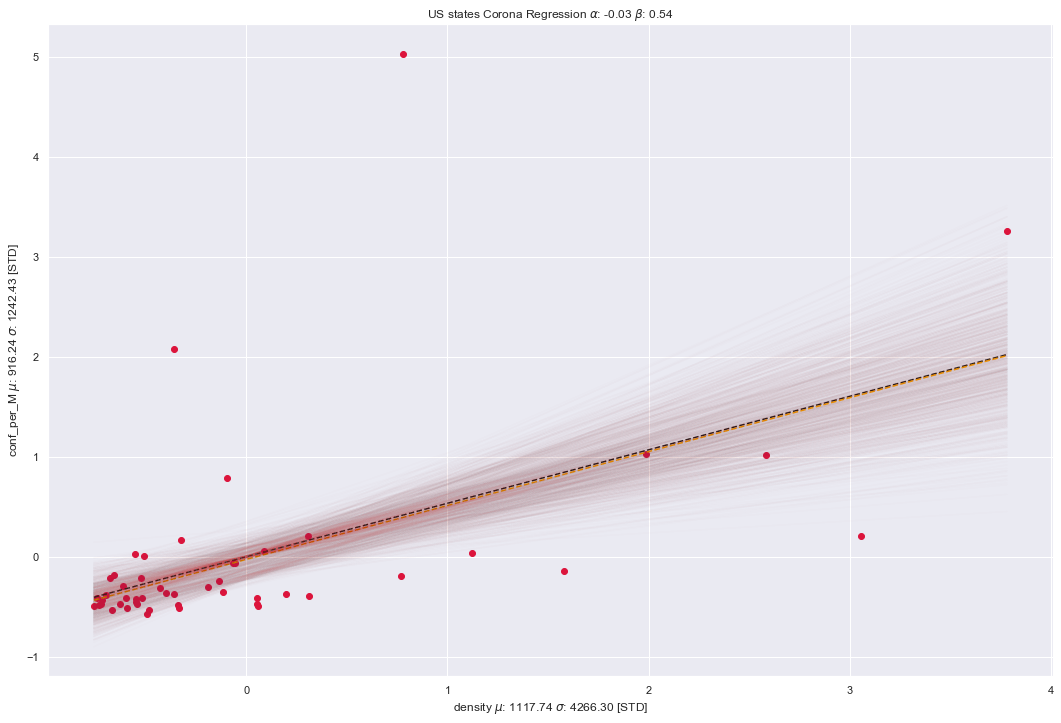

In [8]:
y_param = 'conf_per_M'
x_param = 'density'

x_orig_mean = df[x_param].mean()
x_orig_std = df[x_param].std()
y_orig_mean = df[y_param].mean()
y_orig_std = df[y_param].std()

x = df[x_param]
y = df[y_param]

#### Scatter data ####
plt.figure(figsize=(18,12))
plt.title('US states Corona Regression')
plt.xlabel(x_param + ' ')
plt.ylabel(y_param + ' ')
plt.scatter(x,y,color='crimson')

plt.savefig('US_states_scatter_{}_{}.jpg'.format(x_param,y_param))

#### EXTREME OUTLIERS ####
df = df[df.loc[:,'state'] != 'District of Columbia']
#df = df[df.loc[:,'state'] != 'New York']
####

x = standardize(df[x_param])
y = standardize(df[y_param])
####

slope,intercept,_,_,_ = sps.linregress(x,y)

####

####

result = regression (x,y)
print()
print (result.describe())

X = np.linspace(min(x),max(x),1000)

alpha_samples = np.random.choice(result.alpha_post,replace=True,size=len(X))
beta_samples = np.random.choice(result.beta_post,replace=True,size=len(X))

alpha_mean = alpha_samples.mean()
alpha_std = alpha_samples.std()
beta_mean = beta_samples.mean()
beta_std  = beta_samples.std()

plt.figure(figsize=(18,12))
plt.title(r'US states Corona Regression $\alpha$: {:.2f} $\beta$: {:.2f}'.format(alpha_mean,beta_mean))
plt.xlabel(x_param + r' $\mu$: {:.2f} $\sigma$: {:.2f} [STD]'.format(x_orig_mean,x_orig_std))
plt.ylabel(y_param + r' $\mu$: {:.2f} $\sigma$: {:.2f} [STD]'.format(y_orig_mean,y_orig_std))
plt.scatter(x,y,color='crimson')
plt.plot(X,[X[i] * slope + intercept for i in range(len(X))],color='k',ls='dashed')
plt.plot(X,[X[i] * beta_mean + alpha_mean for i in range(len(X))],color='orange',ls='dashed')

lines = np.array([X[i] * beta_samples + alpha_samples for i in range(len(X))])

_ = plt.plot(X,lines,color='r',alpha=0.01)

plt.savefig('US_states_regression_{}_{}.jpg'.format(x_param,y_param))

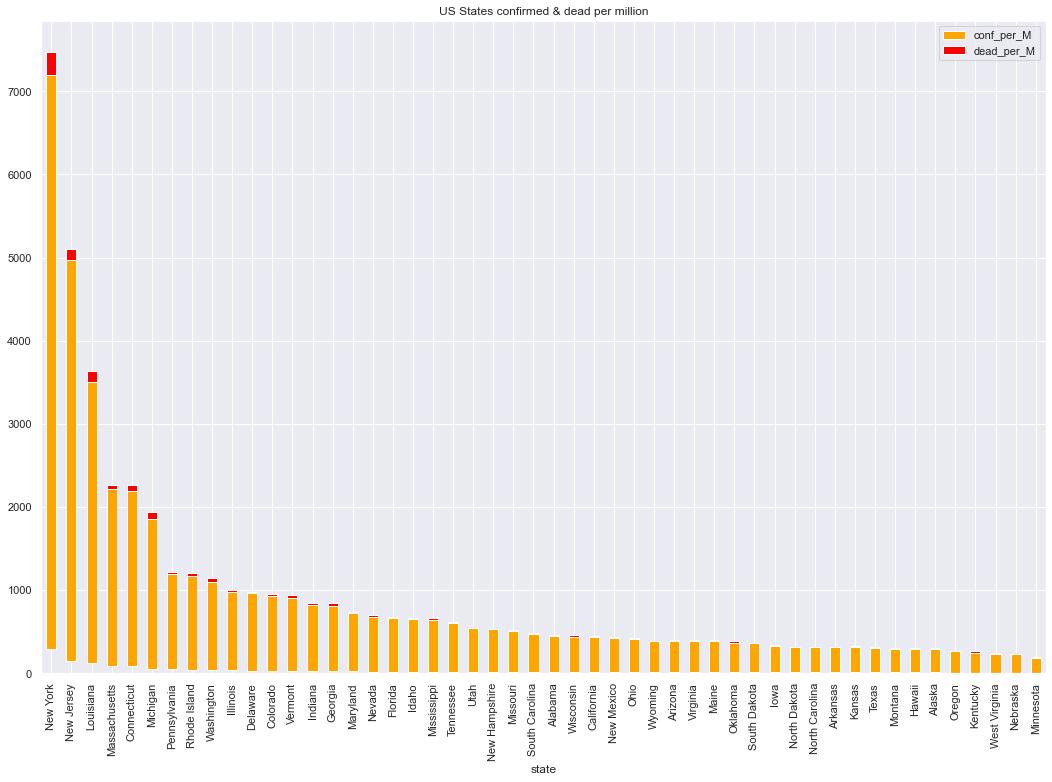

In [9]:
colors = ['orange','red']

temp = df.copy()

temp['conf_per_M'] -= temp['dead_per_M']

bottom = temp['dead_per_M']

temp.sort_values('conf_per_M',ascending=False).plot(
    kind='bar',x='state',y=['conf_per_M','dead_per_M'],figsize=(18,12),color=colors,
title='US States confirmed & dead per million',stacked=True,bottom=bottom)

plt.savefig('US_states_conf_per_M.jpg',format='jpg')